In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.font_manager as fm

In [14]:
#글씨설정
plt.rc("font",family="Malgun Gothic")
sns.set(font="Margun Gothic",rc={"axes.unicode_minus":False},style='darkgrid')
mpl.rc('font',family='Malgun Gothic')
plt.rcParams['axes.unicode_minus']=False

#맷플롯립 한글 설정
font_path = r'C:\Users\dudtj\OneDrive\Desktop\금융데이터\NanumFontSetup_TTF_ALL'
fontprop = fm.FontProperties(fname=font_path, size=18)

In [13]:
data = pd.read_csv(r'C:\Users\dudtj\OneDrive\Desktop\python\금융데이터\금융보안원_경진대회_데이터(최종제출)1.csv',encoding='euc-kr')

In [ ]:
data.head()

In [ ]:
data.info()

In [15]:
data_df = pd.DataFrame(data)

In [17]:
data_df['매출금액'] = data_df['매출금액']/10000

In [ ]:
data_df[['매출금액', '매출건수']].describe()

In [18]:
data_L_M = data_df[(data_df.품목대분류명 =='여가/스포츠')|(data_df.품목대분류명 =='전자')|(data_df.품목대분류명 =='식품')|(data_df.품목대분류명 =='e상품/서비스')]
data_L_M

,기준년월,품목대분류코드,품목대분류명,품목중분류코드,품목중분류명,성별,연령,가구생애주기,고객소재지_광역시도,고객소재지_시군구,고객소재지_읍면동,매출금액,매출건수
1,201903,21,e상품/서비스,2110,o2o서비스,여성,20대,신혼영유아가구,서울특별시,구로구,궁동,96.3789,29
3,201903,21,e상품/서비스,2111,e머니/상품권,여성,30대,신혼영유아가구,서울특별시,구로구,궁동,108.9360,54
8,201903,15,전자,1510,가전,여성,20대,1인가구,서울특별시,강동구,길동,242.9276,17
10,201903,20,여가/스포츠,2013,여행,남성,40대,신혼영유아가구,서울특별시,강동구,길동,111.9710,17
12,201903,15,전자,1511,디지털,남성,40대,신혼영유아가구,서울특별시,강동구,길동,252.5664,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...
519287,202103,21,e상품/서비스,2110,o2o서비스,여성,60대 이상,노인가구,서울특별시,성북구,동소문동7가,38.5208,7
519292,202103,20,여가/스포츠,2013,여행,여성,30대,1인가구,서울특별시,영등포구,영등포동7가,141.1368,7
519293,202103,21,e상품/서비스,2110,o2o서비스,남성,30대,1인가구,서울특별시,영등포구,영등포동7가,138.6040,63
519295,202103,16,식품,1610,가공식품,남성,40대,초중고자녀가구,서울특별시,영등포구,영등포동7가,32.7592,7


In [19]:
data_L_M = data_df[['기준년월','품목대분류명', '매출금액']]
data_L_M

기준년월
201903    1.355119e+07
201909    1.345659e+07
202003    1.582550e+07
202009    1.767186e+07
202103    1.935085e+07
Name: 매출금액, dtype: float64

In [ ]:
grouped_L_M = data_L_M['매출금액'].groupby(data_L_M['품목대분류명']).sum()
df_g_L_M = pd.DataFrame(grouped_L_M)
df_g_L_M

In [21]:
df_g_L_M.rename(columns={'매출금액':'매출합계'}, inplace = True)
df_g_L_M.reset_index(inplace=True)
df_g_L_M.rename(columns= {'품목대분류명' : 'largecategory', '매출합계' : 'Total'}, inplace= True)
df_g_L_M


,기준년월,Total
0,201903,1.355119e+07
1,201909,1.345659e+07
2,202003,1.582550e+07
3,202009,1.767186e+07
4,202103,1.935085e+07


In [ ]:
plt.rcParams['font.family'] = 'NanumGothic'
plt.rcParams['font.size'] = 23
plt.rcParams['figure.figsize'] = (10, 8)

In [ ]:
fig, ax = plt.subplots(1, 1, figsize = (10, 8))
sns.barplot(x = 'largecategory', y = 'Total', data = df_g_L_M)
fig.autofmt_xdate(rotation = 45)

In [ ]:
data_L_C = data_df[['품목대분류명', '매출건수']]
data_L_C

,품목대분류명,매출건수
0,의류,13
1,e상품/서비스,29
2,출산/육아,46
3,e상품/서비스,54
4,생활,58
...,...,...
519292,여가/스포츠,7
519293,e상품/서비스,63
519294,패션잡화,7
519295,식품,7


In [ ]:
grouped_L_C = data_L_C['매출건수'].groupby(data_L_C['품목대분류명']).sum()
df_L_C = pd.DataFrame(grouped_L_C);df_L_C

품목대분류명
e상품/서비스    12109299
가구           135554
건강           890922
기타           291332
뷰티           801723
생활          1604069
식품          2904327
여가/스포츠      2388971
의류           901036
인테리어         334541
전자           959948
출산/육아       1397660
패션잡화         704807
Name: 매출건수, dtype: int64

In [ ]:
df_L_C.reset_index(inplace=True)
df_L_C.rename(columns={'품목대분류명':'largecategory', '매출건수':'Total'}, inplace=True)
df_L_C

,largecategory,Total
0,e상품/서비스,12109299
1,가구,135554
2,건강,890922
3,기타,291332
4,뷰티,801723
5,생활,1604069
6,식품,2904327
7,여가/스포츠,2388971
8,의류,901036
9,인테리어,334541


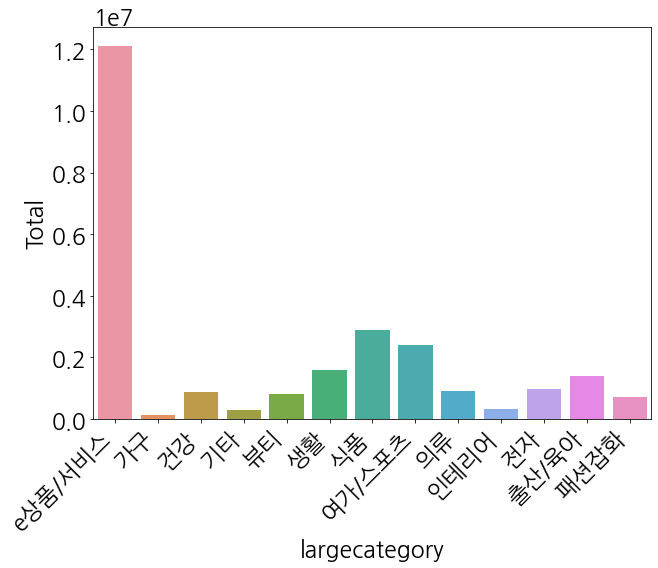

In [ ]:
fig, ax = plt.subplots(1, 1, figsize = (10, 8))
sns.barplot(x = 'largecategory', y = 'Total', data = df_L_C)
fig.autofmt_xdate(rotation = 45)

In [ ]:
data_L_M.set_index('기준년월', inplace=True)

In [ ]:
data_L_M

,품목대분류명,매출금액
기준년월,,
201903,의류,78.2521
201903,e상품/서비스,96.3789
201903,출산/육아,92.4309
201903,e상품/서비스,108.9360
201903,생활,165.6740
...,...,...
202103,여가/스포츠,141.1368
202103,e상품/서비스,138.6040
202103,패션잡화,39.0818


In [ ]:
df_L_M1903 = data_L_M.loc[201903]
df_L_M1909 = data_L_M.loc[201909]
df_L_M2003 = data_L_M.loc[202003]
df_L_M2009 = data_L_M.loc[202009]
df_L_M2103 = data_L_M.loc[202103]

In [ ]:
dfset = [df_L_M1903, df_L_M1909, df_L_M2003, df_L_M2009, df_L_M2103]
for df in dfset:
    df.rename(columns={'매출금액':'매출합계'}, inplace = True)
    df.reset_index(inplace=True)
    df.rename(columns= {'품목대분류명' : 'largecategory', '매출합계' : 'Total_Money'}, inplace= True)

C:\Users\user\anaconda3\lib\site-packages\pandas\core\frame.py:4441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [ ]:
df_L_M1903

,기준년월,largecategory,Total_Money
0,201903,의류,78.2521
1,201903,e상품/서비스,96.3789
2,201903,출산/육아,92.4309
3,201903,e상품/서비스,108.9360
4,201903,생활,165.6740
...,...,...,...
68256,201903,의류,126.0455
68257,201903,출산/육아,289.4378
68258,201903,e상품/서비스,1327.6210
68259,201903,여가/스포츠,22.3538


In [ ]:
dfLM = data_df[['기준년월', '품목대분류명','품목중분류명','매출금액']]
dfLM

,기준년월,품목대분류명,품목중분류명,매출금액
0,201903,의류,여성의류,78.2521
1,201903,e상품/서비스,o2o서비스,96.3789
2,201903,출산/육아,육아용품서비스,92.4309
3,201903,e상품/서비스,e머니/상품권,108.9360
4,201903,생활,생활용품,165.6740
...,...,...,...,...
519292,202103,여가/스포츠,여행,141.1368
519293,202103,e상품/서비스,o2o서비스,138.6040
519294,202103,패션잡화,시계/주얼리,39.0818
519295,202103,식품,가공식품,32.7592


In [ ]:
def get_barplot_M(category):
    dfLM_bar = dfLM[dfLM['품목대분류명'] == category]
    sns.barplot(x = '품목중분류명', y = '매출금액', hue = '기준년월', data = dfLM_bar)

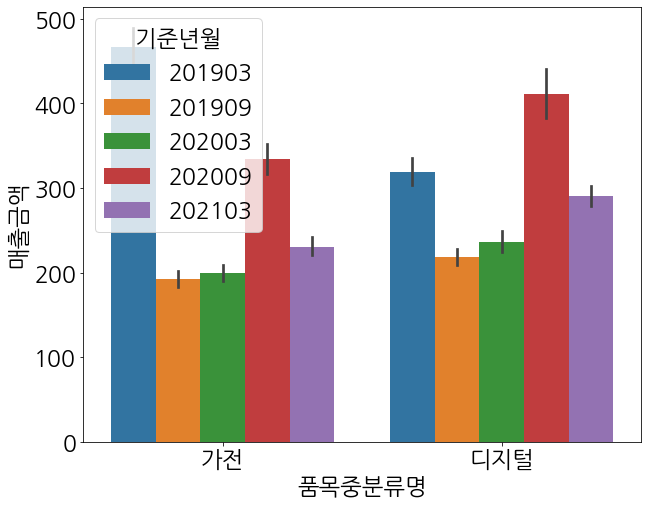

In [ ]:
get_barplot_M('전자')

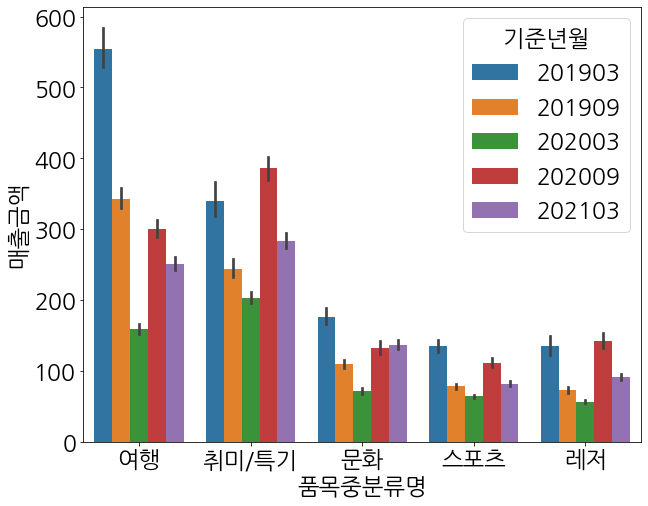

In [ ]:
get_barplot_M('여가/스포츠')

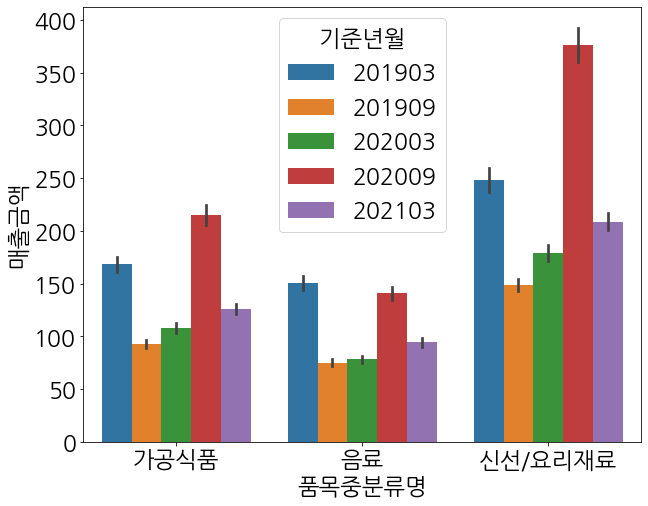

In [ ]:
get_barplot_M('식품')

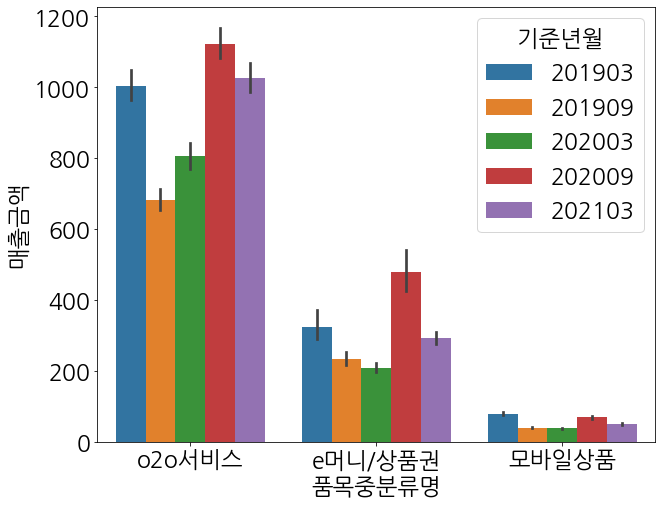

In [ ]:
get_barplot_M('e상품/서비스')

In [ ]:
def get_barplot_C(category):
    dfLC = data_df[['기준년월', '품목대분류명','품목중분류명','매출건수']]
    dfLC
    dfLC_bar = dfLC[dfLC['품목대분류명'] == category]
    sns.barplot(x = '품목중분류명', y = '매출건수', hue = '기준년월', data = dfLC_bar)

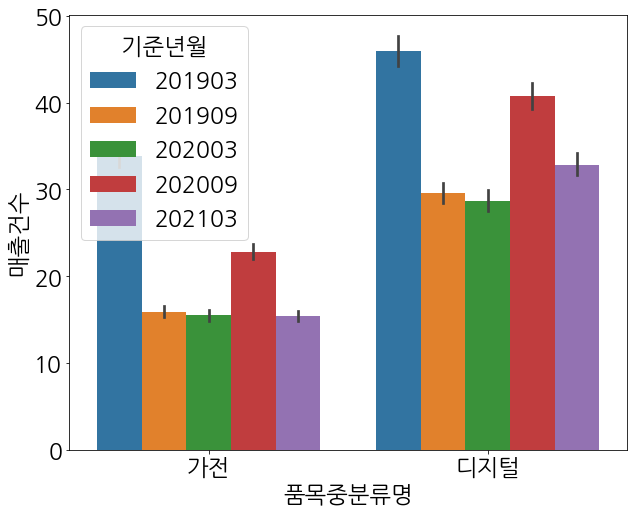

In [ ]:
get_barplot_C('전자')

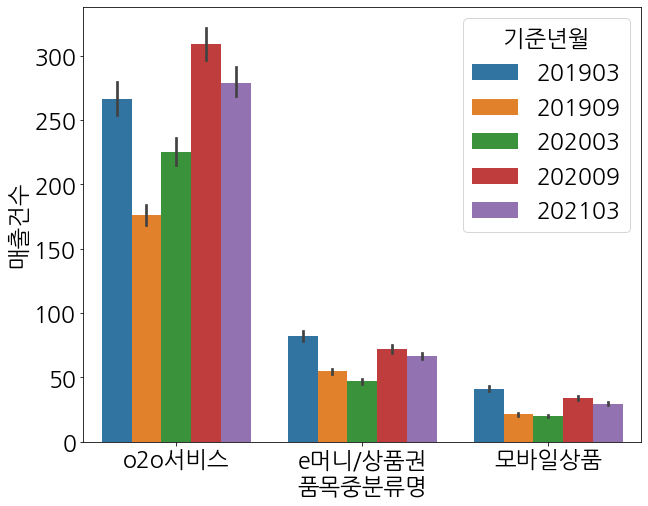

In [ ]:
get_barplot_C('e상품/서비스')

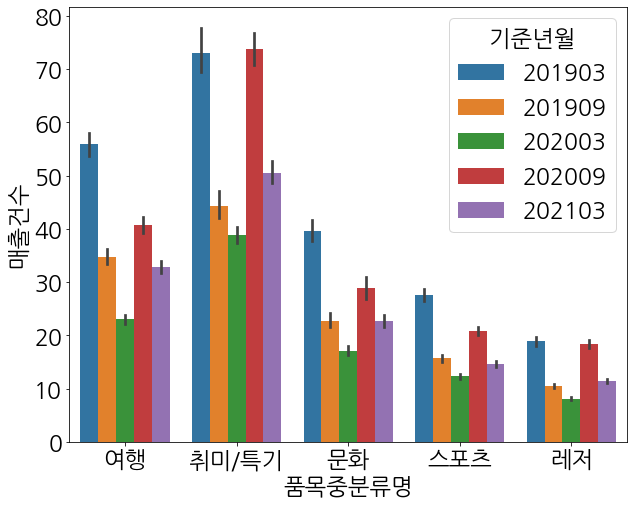

In [ ]:
get_barplot_C('여가/스포츠')

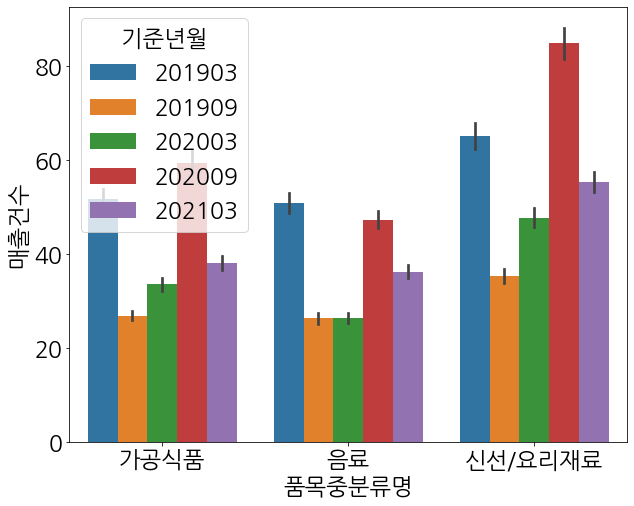

In [ ]:
get_barplot_C('식품')

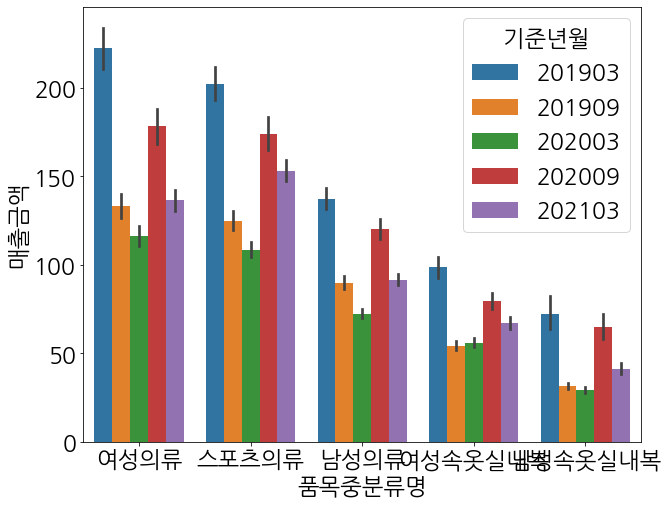

In [ ]:
get_barplot_M('의류')

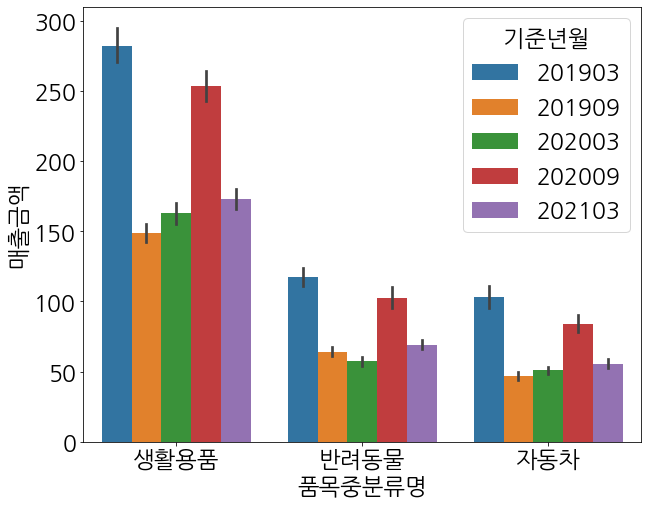

In [ ]:
get_barplot_M('생활')

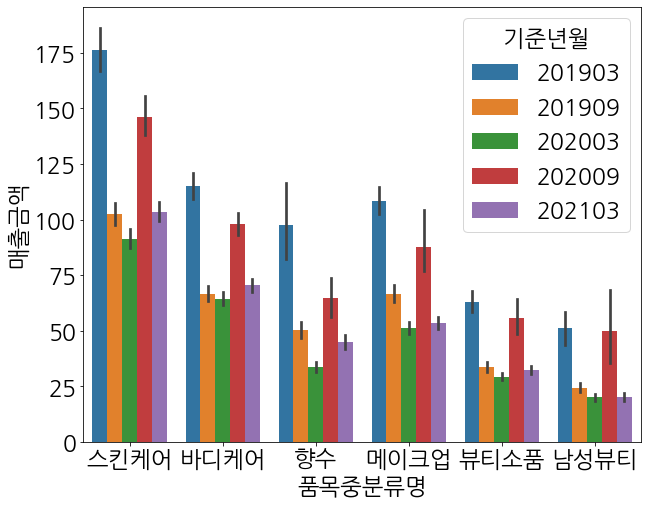

In [ ]:
get_barplot_M('뷰티')

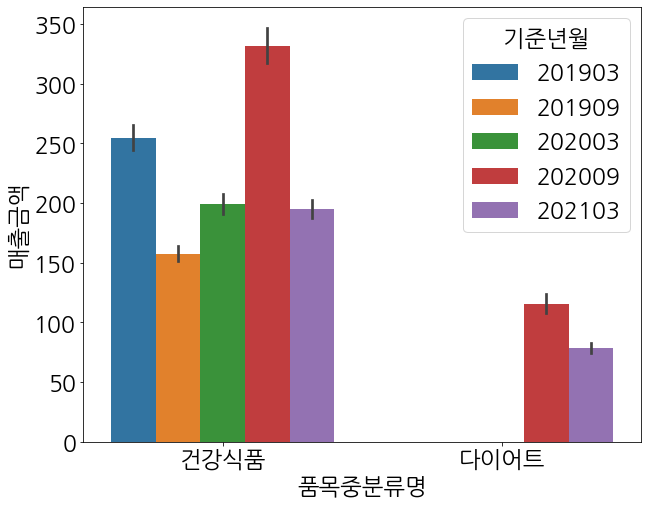

In [ ]:
get_barplot_M('건강')

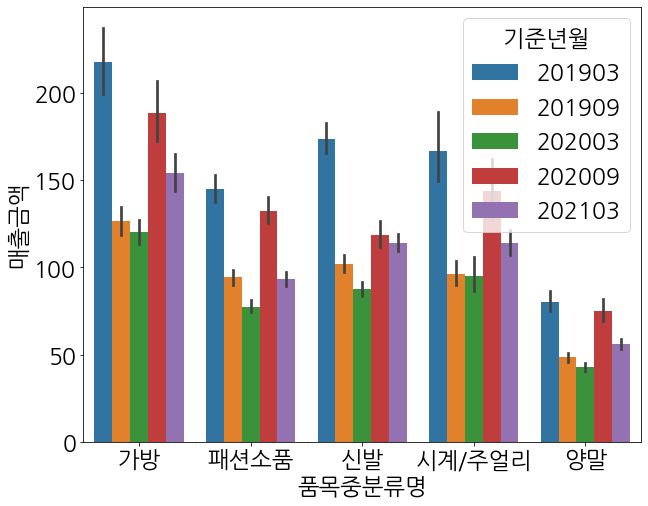

In [ ]:
get_barplot_M('패션잡화')

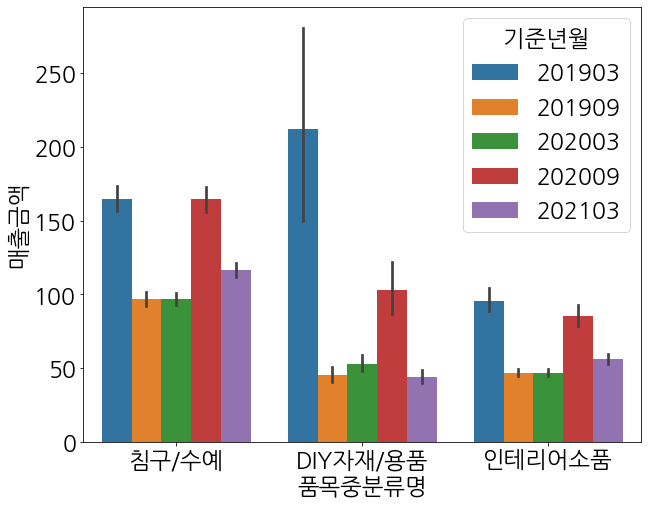

In [ ]:
get_barplot_M('인테리어')

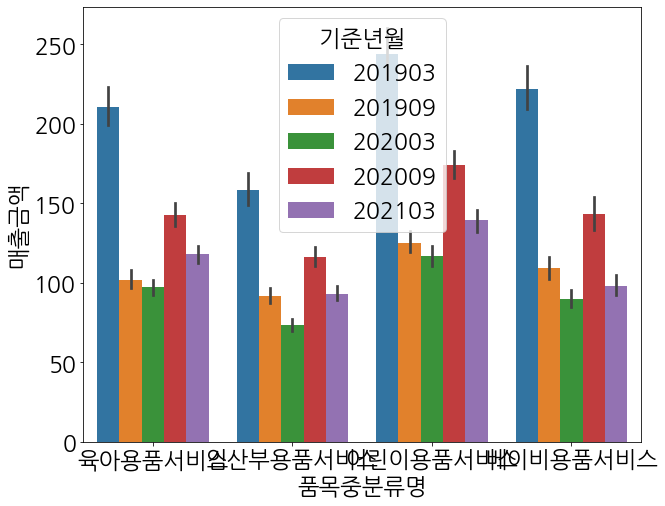

In [ ]:
get_barplot_M('출산/육아')

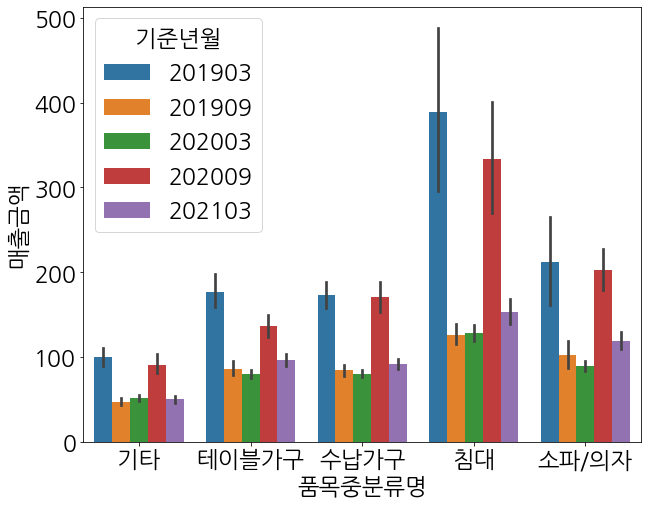

In [ ]:
get_barplot_M('가구')

In [ ]:
df_e = dfLM[dfLM['품목대분류명'] == 'e상품/서비스']
grouped_e = pd.DataFrame(df_e['매출금액'].groupby(df_e['기준년월']).sum())
grouped_e

,매출금액
기준년월,
201903,7.020302e+06
201909,7.255877e+06
202003,9.464159e+06
202009,1.003509e+07
202103,1.164213e+07


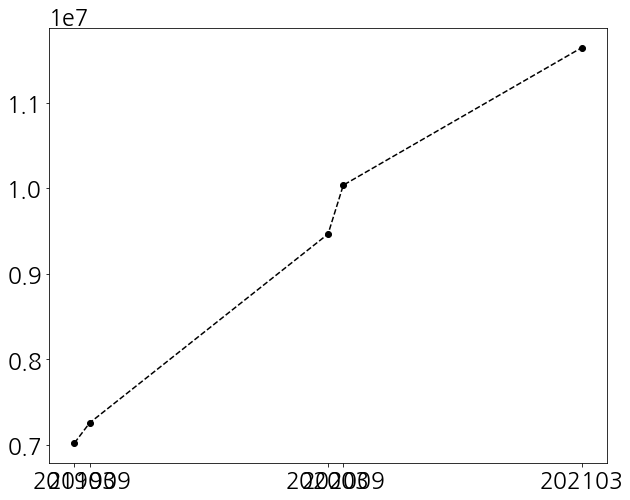

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(grouped_e, 'ko--')
ax.set_xticks([201903, 201909, 202003, 202009, 202103])

In [ ]:
df_e.drop('품목중분류명', axis=1, inplace=True)
df_e

C:\Users\user\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,기준년월,품목대분류명,매출금액
1,201903,e상품/서비스,96.3789
3,201903,e상품/서비스,108.9360
16,201903,e상품/서비스,100.6313
23,201903,e상품/서비스,153.1532
24,201903,e상품/서비스,156.2958
...,...,...,...
519280,202103,e상품/서비스,55.3418
519281,202103,e상품/서비스,72.0728
519287,202103,e상품/서비스,38.5208
519293,202103,e상품/서비스,138.6040


C:\Users\user\anaconda3\lib\site-packages\seaborn\categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


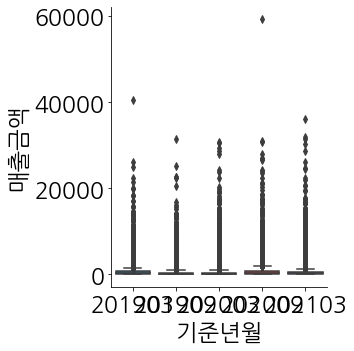

In [ ]:
#box plot
sns.factorplot( x = '기준년월', y = '매출금액', kind = 'box', data = df_e)